In [4]:
# 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image

import pandas as pd
import numpy as np
import os
import string
import sys
import re
import datetime as dt
# now = dt.datetime.now().strftime('%y%m%d_%H%M%S')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 진행 여부 함수
def yes_or_no(question):
    while "the answer is invalid":
        reply = str(input(question+' (y/n): ')).lower().strip()
        if reply[0] == 'y':
            return True
        if reply[0] == 'n':
            return False
        else:
            print("실패: 'y' 혹은 'n' 를 입력해 주세요")

In [5]:
# 파일 불러오기
sheet_name = "컬럼분석"
input_path = os.path.join(os.getcwd(), "data\\")
output_path = os.path.join(os.getcwd(), "data\\out\\")
data = pd.read_excel(input_path+"기상자료개방포털 컬럼 조사.xlsx", sheet_name=sheet_name, header=0)

# # null 제거
# for i in range(len(input_test.columns)):
#     input_test[input_test.columns[i]] = input_test[input_test.columns[i]].fillna("")
# print(input_test.shape)
# input_test.head(5)

### 대분류 나누기( Data1 ~ Data11)

In [6]:
# 컬럼리스트 만들기
col_list = data.columns.to_list()

### 모델 A (자료제공컬럼 - 전체/대분류별 통계)
1. 모델 A-1(자료제공컬럼 - 전체)
2. 모델 A-2(자료제공컬럼 - 대분류별 통계)

In [29]:
# 제공자료컬럼 그룹바이
data = data.groupby(['대분류', '중분류', '소분류', '제공자료컬럼']).head()
print(data.shape)
data.head()

(679, 17)


,INDEX,대분류,중분류,소분류,제공자료컬럼,예시,체크박스항목1,체크박스항목예시1,체크박스항목1Depth,체크박스항목2,체크박스항목예시2,체크박스항목2Depth,체크박스항목3,체크박스항목예시3,체크박스항목3Depth,추가,특이사항
0,1,기상관측,지상,종관기상관측(ASOS),지점,속초(90),지점,강원도,+1,관측,지면.초상온도,+1,NaN,NaN,NaN,NaN,NaN
1,1,기상관측,지상,종관기상관측(ASOS),시간,2022-11-01 01:00:00,지점,경기도,+1,관측,현상번호,+1,NaN,NaN,NaN,NaN,NaN
2,1,기상관측,지상,종관기상관측(ASOS),기온(°C),10.4,지점,경상남도,+1,관측,기온,+1,NaN,NaN,NaN,NaN,NaN
3,1,기상관측,지상,종관기상관측(ASOS),기온 QC플래그,NaN,지점,경상북도,+1,관측,강수,+1,NaN,NaN,NaN,NaN,NaN
4,1,기상관측,지상,종관기상관측(ASOS),강수량(mm),NaN,지점,광주광역시,+1,관측,바람,+1,NaN,NaN,NaN,NaN,NaN


In [30]:
# 대분류 리스트
lar_catgr = data['대분류'].drop_duplicates().reset_index()['대분류']
# 중분류 리스트
mid_catgr = data['중분류'].drop_duplicates().reset_index()['중분류']
# 소분류 리스트
sml_catgr = data['소분류'].drop_duplicates().reset_index()['소분류']
# 전체 분류 리스트(사전)
tmp = data['소분류'].drop_duplicates().reset_index()
tmp_list = tmp['index'].to_list()
total_catgr = data.loc[tmp_list,['대분류','중분류','소분류']]
total_catgr

,대분류,중분류,소분류
0,기상관측,지상,종관기상관측(ASOS)
37,기상관측,지상,방재기상관측(AWS)
54,기상관측,지상,농업기상관측(AAOS)
83,기상관측,지상,북한기상관측
100,기상관측,지상,공공기관 기상관측
253,기상관측,지상,계절관측
280,기상관측,지상,황사관측
314,기상관측,지상,낙뢰관측
320,기상관측,해양,해양기상부이
348,기상관측,해양,등표기상관측


In [9]:
# 각 데이터셋 분류
# 한 엑셀 파일에 저장
writer=pd.ExcelWriter(output_path + "test.xlsx", engine='openpyxl')
for i,j in zip(lar_catgr,range(len(lar_catgr))):
    globals()["data_lar_{}".format(j)] = data['대분류'] == i
    globals()["data_lar_{}".format(j)] = data[globals()["data_lar_{}".format(j)]==True]
    globals()["data_lar_{}".format(j)].to_excel(writer, sheet_name=i)
writer.save()
print(data_lar_0.shape)
data_lar_0.head()

(319, 17)


,INDEX,대분류,중분류,소분류,제공자료컬럼,예시,체크박스항목1,체크박스항목예시1,체크박스항목1Depth,체크박스항목2,체크박스항목예시2,체크박스항목2Depth,체크박스항목3,체크박스항목예시3,체크박스항목3Depth,추가,특이사항
0,1,기상관측,지상,종관기상관측(ASOS),지점,속초(90),지점,강원도,+1,관측,지면.초상온도,+1,NaN,NaN,NaN,NaN,NaN
1,1,기상관측,지상,종관기상관측(ASOS),시간,2022-11-01 01:00:00,지점,경기도,+1,관측,현상번호,+1,NaN,NaN,NaN,NaN,NaN
2,1,기상관측,지상,종관기상관측(ASOS),기온(°C),10.4,지점,경상남도,+1,관측,기온,+1,NaN,NaN,NaN,NaN,NaN
3,1,기상관측,지상,종관기상관측(ASOS),기온 QC플래그,NaN,지점,경상북도,+1,관측,강수,+1,NaN,NaN,NaN,NaN,NaN
4,1,기상관측,지상,종관기상관측(ASOS),강수량(mm),NaN,지점,광주광역시,+1,관측,바람,+1,NaN,NaN,NaN,NaN,NaN


In [10]:
for i,j in zip(range(len(lar_catgr)),lar_catgr):
    print(str(j) + ": " + str(globals()["data_lar_{}".format(i)].shape))

기상관측: (319, 17)
기상위성: (11, 17)
레이더: (8, 17)
기상예보: (75, 17)
수치모델: (30, 17)
기후: (112, 17)
응용기상: (18, 17)
지진화산: (12, 17)
날씨이슈별데이터: (20, 17)
역사기후: (39, 17)
메타데이터: (12, 17)
품질정보: (23, 17)


### 대분류x제공자료컬럼
1. 널 삭제
2. 워딩 카운팅 및 정렬

In [11]:
#대분류x제공자료컬럼
#대분류x체크박스항목

In [12]:
#제공자료컬럼 널 삭제
# 한 엑셀 파일에 저장
writer=pd.ExcelWriter(output_path + "lar_catgr.xlsx", engine='openpyxl')

for i,j in zip(range(len(lar_catgr)), lar_catgr):
    globals()["data_lar_{}".format(i)] = globals()["data_lar_{}".format(i)][globals()["data_lar_{}".format(i)]['제공자료컬럼'].notna()]
    globals()["data_lar_groupBy_{}".format(i)]= globals()["data_lar_{}".format(i)].groupby(['제공자료컬럼']).sum().reset_index().sort_values('INDEX', ascending = False)
    globals()["noun_{}".format(i)] = globals()["data_lar_groupBy_{}".format(i)].iloc[:,0].to_list()
    globals()["cnt_{}".format(i)] = globals()["data_lar_groupBy_{}".format(i)].iloc[:,1].to_list()
    globals()["cloud_dict_{}".format(i)] = dict(zip(globals()["noun_{}".format(i)],globals()["cnt_{}".format(i)]))
    globals()["data_lar_groupBy_{}".format(i)].to_excel(writer, sheet_name=j)
writer.save()

# noun = data_lar_groupBy_3.iloc[:,0].to_list()
# cnt = data_lar_groupBy_3.iloc[:,1].to_list()
# cloud_dict = dict(zip(noun,cnt))

In [13]:
# 워드 클라우드 사이즈 참고
okt = Okt()
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)

In [14]:
data_lar_groupBy_0

,제공자료컬럼,INDEX
204,지점,143
104,시간,94
233,풍향(deg),60
75,기온(°C),52
106,시간(UTC),45
228,풍속(m/s),44
195,중심기압,37
237,해면기압(hPa),36
242,현지기압(hPa),35
73,기온,32


기상관측


,제공자료컬럼,INDEX
204,지점,143
104,시간,94
233,풍향(deg),60
75,기온(°C),52
106,시간(UTC),45


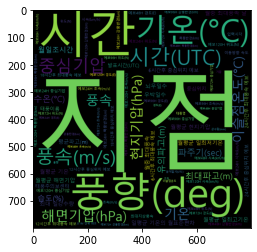

In [15]:
val = cloud_dict_0
gen = wc.generate_from_frequencies(val)
print(lar_catgr[0])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_0.head(5)

기상위성


,제공자료컬럼,INDEX
9,파일사이즈(GB),43
1,관측시간(UTC),22
2,관측일,22
5,영역,22
6,자료구분,22


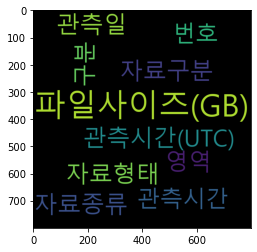

In [16]:
val = cloud_dict_1
gen = wc.generate_from_frequencies(val)
print(lar_catgr[1])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_1.head(5)

레이더


,제공자료컬럼,INDEX
0,관측시간,47
1,구분,47
2,번호,47
3,파일사이즈(MB),47


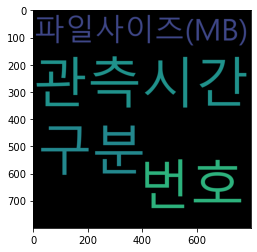

In [17]:
val = cloud_dict_2
gen = wc.generate_from_frequencies(val)
print(lar_catgr[2])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_2.head(5)

기상예보


,제공자료컬럼,INDEX
39,지역,128
34,일시,126
28,영향도,101
21,번호,78
17,날짜,78


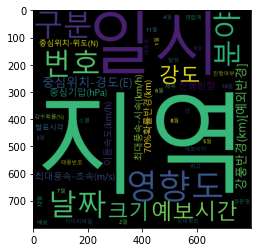

In [18]:
val = cloud_dict_3
gen = wc.generate_from_frequencies(val)
print(lar_catgr[3])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_3.head(5)

수치모델


,제공자료컬럼,INDEX
0,구분,237
1,날짜,237
2,번호,237
5,파일사이즈(GB),237
3,유의파고(m),43


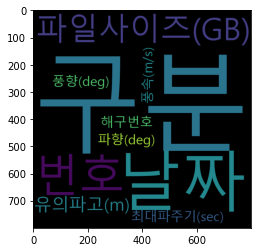

In [19]:
val = cloud_dict_4
gen = wc.generate_from_frequencies(val)
print(lar_catgr[4])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_4.head(5)

기후


,제공자료컬럼,INDEX
46,지점,432
32,시간,432
43,종료시각,92
33,시작시각,92
7,SPI5,52


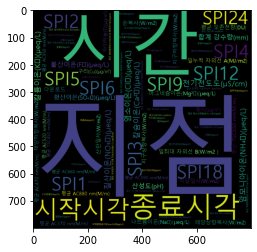

In [20]:
val = cloud_dict_5
gen = wc.generate_from_frequencies(val)
print(lar_catgr[5])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_5.head(5)

응용기상


,제공자료컬럼,INDEX
2,다운로드,111
7,자료용량(MB),111
8,자료종류,111
3,번호,107
4,예보시간-내일,107


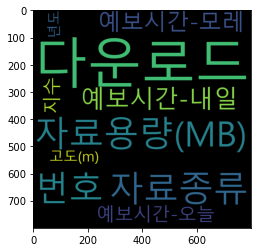

In [21]:
val = cloud_dict_6
gen = wc.generate_from_frequencies(val)
print(lar_catgr[6])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_6.head(5)

지진화산


,제공자료컬럼,INDEX
0,경도,115
1,규모,115
2,시간,115
3,위도,115
4,위치,115


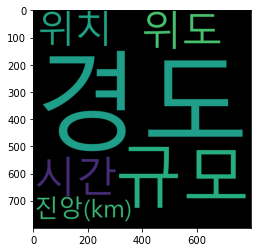

In [22]:
val = cloud_dict_7
gen = wc.generate_from_frequencies(val)
print(lar_catgr[7])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_7.head(5)

날씨이슈별데이터


,제공자료컬럼,INDEX
0,구분,242
1,번호,242
2,생산일,242
3,용량(KB),242
4,형식,242


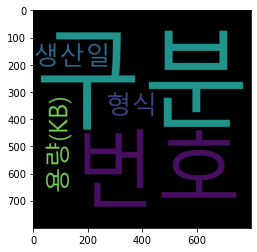

In [23]:
val = cloud_dict_8
gen = wc.generate_from_frequencies(val)
print(lar_catgr[8])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_8.head(5)

역사기후


,제공자료컬럼,INDEX
18,지역,393
6,번호,327
16,자료종류,258
10,상세정보,135
12,연도,131


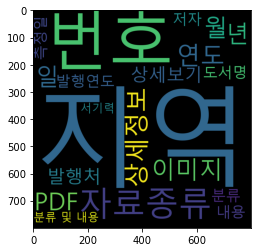

In [24]:
val = cloud_dict_9
gen = wc.generate_from_frequencies(val)
print(lar_catgr[9])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_9.head(5)

메타데이터


,제공자료컬럼,INDEX
9,통계방법,142
1,관측요소,71
2,단위,71
4,종류,71
7,최소자릿수,71


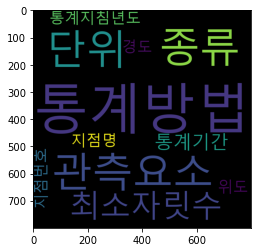

In [25]:
val = cloud_dict_10
gen = wc.generate_from_frequencies(val)
print(lar_catgr[10])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_10.head(5)

품질정보


,제공자료컬럼,INDEX
0,CDMS_MQC,73
1,COMIS_MQC,73
21,지점번호,73
20,지속성,73
19,정역학일치성,73


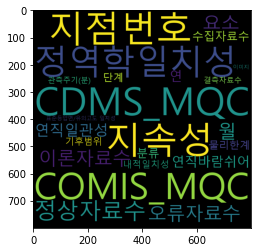

In [26]:
val = cloud_dict_11
gen = wc.generate_from_frequencies(val)
print(lar_catgr[11])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_11.head(5)

,제공자료컬럼,INDEX
155,번호,1059
188,시간,641
104,구분,625
340,지점,575
339,지역,521


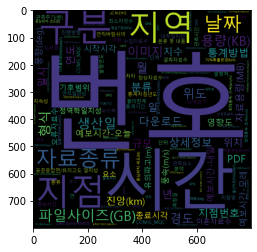

In [27]:
# 전체 자료 merge
total_cnt = pd.concat([data_lar_groupBy_0, data_lar_groupBy_1, data_lar_groupBy_2, data_lar_groupBy_3, data_lar_groupBy_4, data_lar_groupBy_5, data_lar_groupBy_6, data_lar_groupBy_7, data_lar_groupBy_8, data_lar_groupBy_9, data_lar_groupBy_10, data_lar_groupBy_11])
total_cnt = total_cnt.groupby('제공자료컬럼').sum().reset_index().sort_values('INDEX', ascending=False)
# total_cnt

# 디셔너리 생성
noun_total_cnt = total_cnt.iloc[:,0].to_list()
cnt_total_cnt = total_cnt.iloc[:,1].to_list()
cloud_dict_total_cnt = dict(zip(noun_total_cnt,cnt_total_cnt))

# 워드 클라우드 구현
val = cloud_dict_total_cnt
gen = wc.generate_from_frequencies(val)
plt.figure()
plt.imshow(gen)
total_cnt.head(5)

In [28]:
# 주요 제외 필터
cloud_dict_filter = cloud_dict_a.copy()
cloud_dict_filter.pop('번호')
cloud_dict_filter.pop('시간')
cloud_dict_filter.pop('구분')
cloud_dict_filter.pop('지점')
cloud_dict_filter.pop('지역')

# 워드 클라우드
val = cloud_dict_filter
gen = wc.generate_from_frequencies(val)
plt.figure()
plt.imshow(gen)
total_cnt.head(5)

NameError: name 'cloud_dict_a' is not defined

In [ ]:
data['대분류'].drop_duplicates().reset_index()['대분류']

In [ ]:
data['중분류'].drop_duplicates().reset_index()

In [ ]:
a = data['중분류'].drop_duplicates().reset_index()
aa = a['index'].to_list()
data.loc[aa,'대분류']

In [ ]:
data.loc[aa,'대분류']

In [ ]:
col_list = data.columns.to_list()

In [ ]:
col = col_list[6]
print(col)
data[col].str.split('-').map(lambda x : x)

In [ ]:
col = col_list[8]
print(col)
data[col].str.split('-').map(lambda x: x)

In [ ]:
# 컬럼 추리기
col = col_list[6]
print(col)
tmp = data.loc[data[col].notna(), col].reset_index()
tmp = tmp['체크박스항목1']
# data[col].str.split('-').map(lambda x: x)
tmp

In [ ]:
len(tmp)

In [ ]:
tmp.head(100)

In [ ]:
# '-' 포함한 단어들만 추리기
tmp_list = []
for i in range(len(tmp)):
    if re.findall('-', tmp[i]) == ['-']:
        tmp_list.append(i)

In [ ]:
tmp[35].split('-')

In [ ]:
tmp[tmp_list]

In [ ]:
tmp[0]

In [ ]:
tmp.isin('-')

In [ ]:
tmp.str.split('-').map(lambda x: x[0])

In [ ]:
os.getcwd()

# 워드 클라우드 ( 테스트)

In [ ]:
import jpype

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image
import numpy as np

In [ ]:
with open(input_path + 'test1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [ ]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='malgun', width=10000, height=10000, scale=2.0, max_font_size=2500)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
# 엑셀 한 시트에 저장
# #1. 파일 생성
# writer=pd.ExcelWriter('테스트파일명.xlsx', engine='openpyxl')
 
# #2. 생성 파일에 시트명 지정 후 dataframe에 저장한 결과값 넣기
# df1.to_excel(writer, sheet_name='sheet1')
 
 
# # 3. 작성 완료 후 파일 저장
# writer.save()

In [ ]:
# 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image
import numpy as np

with open(input_path + 'test1.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)